**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [3]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [5]:
import pandas as pd

# Load Data
file_path = 'GOOG.csv'  # Correct path in Colab / Jupyter content folder
data = pd.read_csv(file_path)

# View the first few rows to check
print(data.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2021-09-27  141.585495  142.500000  140.500000  141.501007  141.501007   
1  2021-09-28  139.088501  139.606506  135.699997  136.184006  136.184006   
2  2021-09-29  137.109695  137.398499  134.250000  134.520996  134.520996   
3  2021-09-30  134.324997  135.589996  133.000000  133.265503  133.265503   
4  2021-10-01  133.554504  137.070999  133.377502  136.462494  136.462494   

     Volume  
0  18844000  
1  42190000  
2  26338000  
3  35294000  
4  28388000  


In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Use only the 'Close' column
close_prices = data['Close'].values  # Convert to NumPy array
close_prices = close_prices.reshape(-1, 1)  # Reshape to 2D for scaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices)

# Now scaled_close is ready for LSTM input
print(scaled_close[:5])


[[0.82133932]
 [0.71817471]
 [0.68590769]
 [0.66154764]
 [0.72357816]]


**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [9]:
import numpy as np

def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])  # past 'time_step' values
        y.append(dataset[i + time_step, 0])      # next value
    return np.array(X), np.array(y)


In [10]:
time_step = 60
X, y = create_dataset(scaled_close, time_step)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (190, 60)
y shape: (190,)


In [11]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [12]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

model = Sequential()

# Input layer
model.add(Input(shape=(time_step, 1)))

# First LSTM layer
model.add(LSTM(units=64, return_sequences=True))   # try 32, 50, 100, etc.
model.add(Dropout(0.3))                           # try 0.2, 0.3, 0.5

# Second LSTM layer
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Dense output layer
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')


***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [14]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.4108
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1276
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.1224
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.1257
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.1055
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0929
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.1094
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0907
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1026
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0861
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0966
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0876
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1018
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0868
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0878
Epoch 16/20
5/5 ━━━━━━━━━━━━━━

In [16]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step


In [17]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

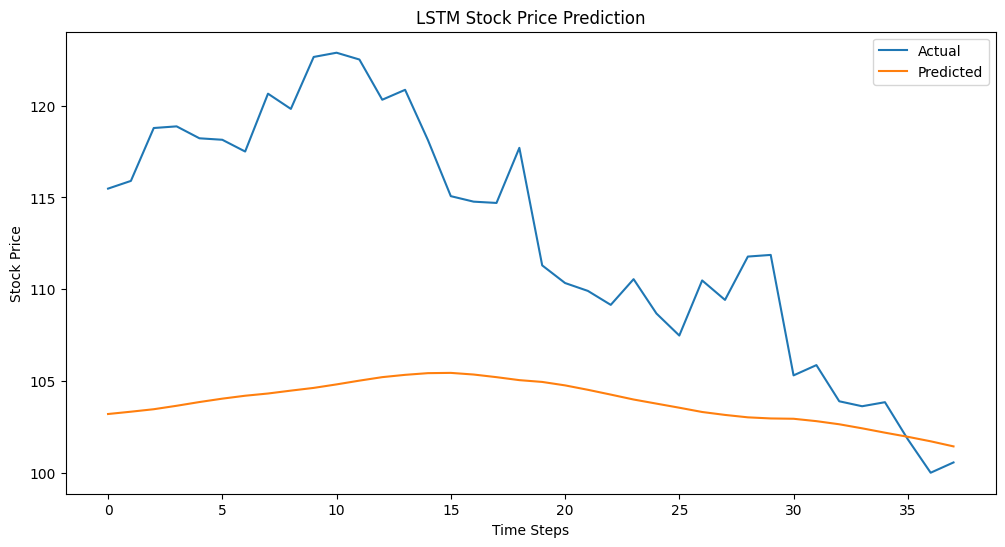

In [18]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
2.	What is the purpose of the Dropout layer in the LSTM model?
3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?
